# Finding the Effects of Calibration Errors on Reduction Factor of SSS Filtering

## Paul Yollin

In order to find the effects of possible calibration errors
on the reduction factors of SSS filtering I have generated
a diagonal matrix, mimicking randomly distributed calibration
errors. I then applied this diagonal matrix to our four eddy current
measurements along with some empty room recordings.

In [1]:
import Funfile as Fun
import numpy as np
import matplotlib.pyplot as plt

params = {
    'f_ext': 'Hz_10v_erm_raw.fif',
    '5': {'start': 80, 'stop': 120},
    '20': {'start': 0, 'stop': 40},
    '70': {'start': 70, 'stop': 110},
    '105': {'start': 65, 'stop': 105},
    'erm': {'start': 0, 'stop': 306}
}

xs = np.arange(1,8)

#### Generating the diagonal matrix

Note here that I am making a diagonal matrix that is 333x333. The first
306 diagonal entries are what will be applied to our channels (magnetometers
and gradiometers). So on the first 306 diagonal entices are ones plus
randomly distributed errors, range (0,1]. I also generated an Identity matrix
of size 333x333.

I have plotted the diagonal values to enable easy visualization of the 
generated calibration errors

[Text(0, 0.5, 'Value'),
 Text(0.5, 0, 'Diagonal entry'),
 Text(0.5, 1.0, 'Diagonal values of generated calibration errors matrix')]

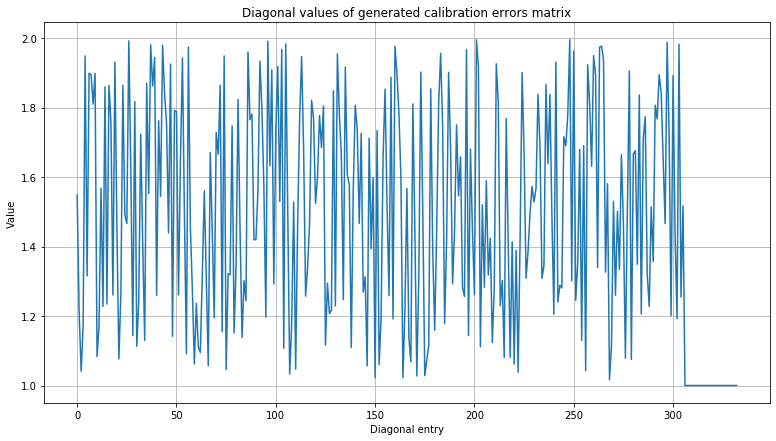

In [2]:
#   Creating vector w/ first 306 elements randomly distributed (1,2], last 27 = 1
diagonal = np.append(1+np.random.rand(306), np.ones(27))

#   Creating a dictionary holding calibration error matrix and an identity matrix
Mats = {
    'Identity': np.diag(np.ones(333)),
    'Cal_error': np.diag(diagonal)
}

#   creating figure and axes to plot vector names 'diagonal'
fig, ax = plt.subplots(1, 1, figsize=(13,7))

#   plotting vector, adding gridlines, setting titles and axes labels
ax.plot(diagonal)
ax.grid()
ax.set(title='Diagonal values of generated calibration errors matrix',
       xlabel='Diagonal entry',
       ylabel='Value')

### Applying generated calibration error matrix to empty room recording

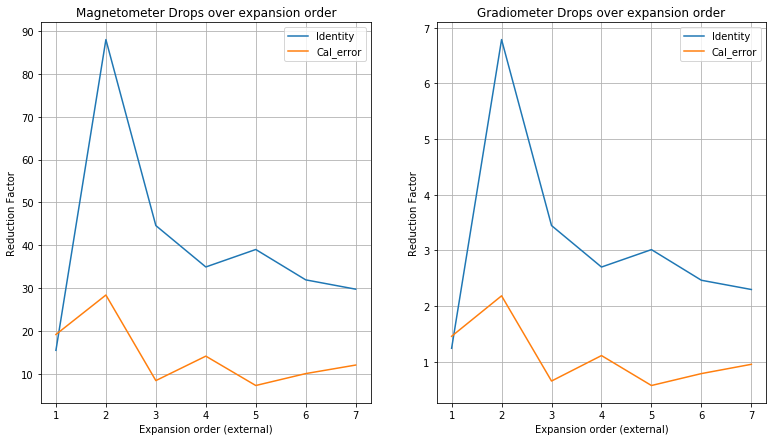

In [3]:
#   Creating dictionary of empty dictionaries to hold calculated reduction factors
erm_drop = {
    'Identity' : {},
    'Cal_error' : {}
}

#   for loop going through and calculating reduction factors
for e in ['Identity', 'Cal_error']:
    for i in xs:
        dat = Fun.RecClass_Order_Cal(file_name='eddy_currents_1_empty_room_raw.fif',
                                     start=params['erm']['start'],
                                     stop=params['erm']['stop'],
                                     internal=1,
                                     external=i,
                                     diag_cal_mat=Mats[e])
        erm_drop[str(e)][str(i)] = Fun.find_drop_order(dat.data)
del i, e

#   using plot_drop_order function found in FunFile to plot reduction factors
Fun.plot_drop_order(erm_drop)

### Applying generated calibration error matrix to eddy current recordings

#### 5Hz

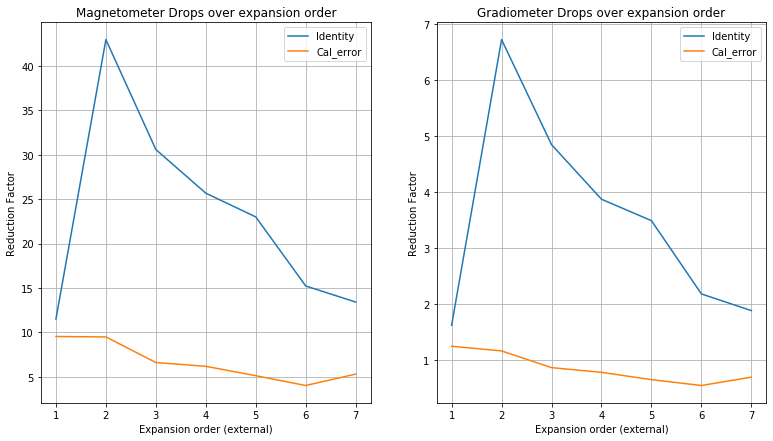

In [4]:
#   Defining the recording and the file name
rec = '5'
file_name = rec + params['f_ext']

#   Creating dictionary of empty dictionaries to hold calculated reduction factors
drop = {
    'Identity' : {},
    'Cal_error' : {}
}

#   for loop going through and calculating reduction factors
for e in ['Identity', 'Cal_error']:
    for i in xs:
        dat = Fun.RecClass_Order_Cal(file_name=file_name,
                                     start=params[rec]['start'],
                                     stop=params[rec]['stop'],
                                     internal=2,
                                     external=i,
                                     diag_cal_mat=Mats[e])
        drop[str(e)][str(i)] = Fun.find_drop_order(dat.data)
del i, e, rec, file_name

#   using plot_drop_order function found in FunFile to plot reduction factors
Fun.plot_drop_order(drop)

#### 20Hz

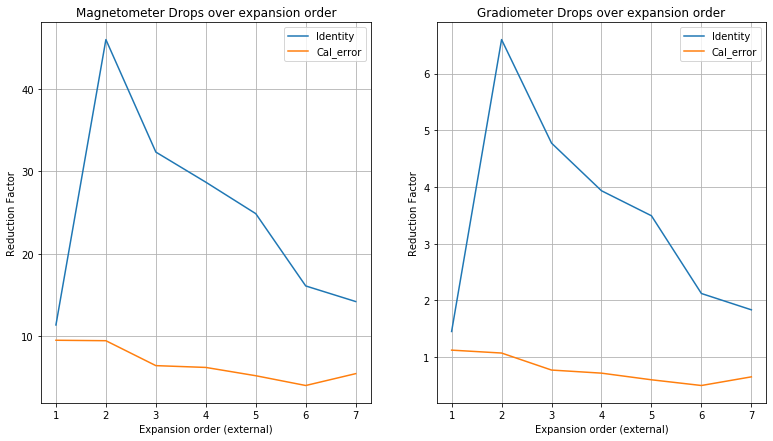

In [5]:
rec = '20'
file_name = rec + params['f_ext']

#   Creating dictionary of empty dictionaries to hold calculated reduction factors
drop = {
    'Identity' : {},
    'Cal_error' : {}
}

#   for loop going through and calculating reduction factors
for e in ['Identity', 'Cal_error']:
    for i in xs:
        dat = Fun.RecClass_Order_Cal(file_name=file_name,
                                     start=params[rec]['start'],
                                     stop=params[rec]['stop'],
                                     internal=2,
                                     external=i,
                                     diag_cal_mat=Mats[e])
        drop[str(e)][str(i)] = Fun.find_drop_order(dat.data)
del i, e, rec, file_name

#   using plot_drop_order function found in FunFile to plot reduction factors
Fun.plot_drop_order(drop)

#### 70Hz

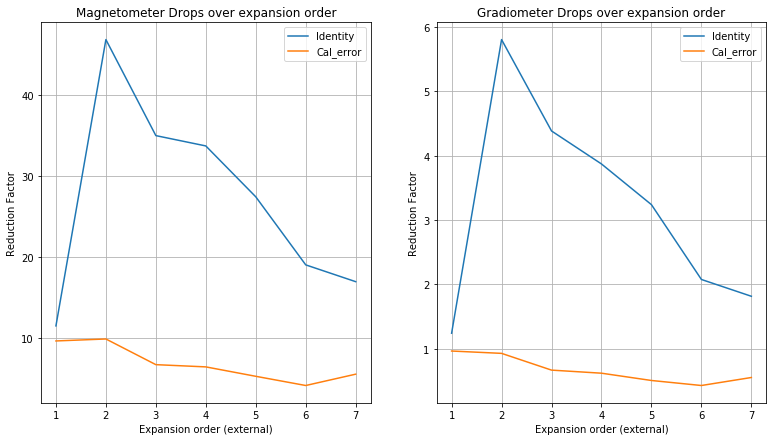

In [6]:
rec = '70'
file_name = rec + params['f_ext']

#   Creating dictionary of empty dictionaries to hold calculated reduction factors
drop = {
    'Identity' : {},
    'Cal_error' : {}
}

#   for loop going through and calculating reduction factors
for e in ['Identity', 'Cal_error']:
    for i in xs:
        dat = Fun.RecClass_Order_Cal(file_name=file_name,
                                     start=params[rec]['start'],
                                     stop=params[rec]['stop'],
                                     internal=2,
                                     external=i,
                                     diag_cal_mat=Mats[e])
        drop[str(e)][str(i)] = Fun.find_drop_order(dat.data)
del i, e, rec, file_name

#   using plot_drop_order function found in FunFile to plot reduction factors
Fun.plot_drop_order(drop)

#### 105Hz

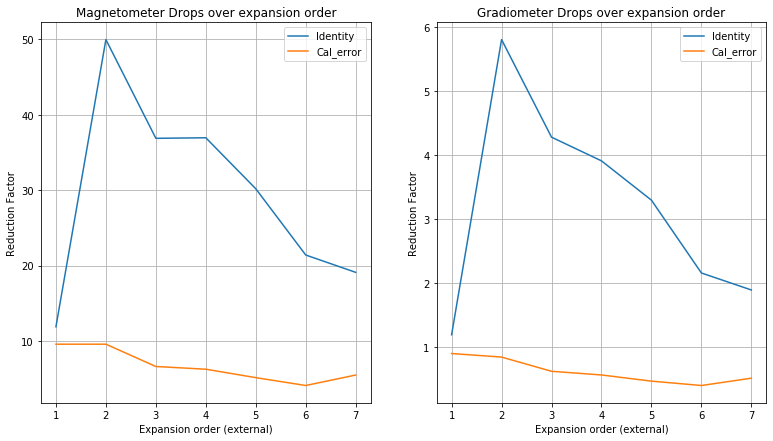

In [7]:
rec = '105'
file_name = rec + params['f_ext']

#   Creating dictionary of empty dictionaries to hold calculated reduction factors
drop = {
    'Identity' : {},
    'Cal_error' : {}
}

#   for loop going through and calculating reduction factors
for e in ['Identity', 'Cal_error']:
    for i in xs:
        dat = Fun.RecClass_Order_Cal(file_name=file_name,
                                     start=params[rec]['start'],
                                     stop=params[rec]['stop'],
                                     internal=2,
                                     external=i,
                                     diag_cal_mat=Mats[e])
        drop[str(e)][str(i)] = Fun.find_drop_order(dat.data)
del i, e, rec, file_name

#   using plot_drop_order function found in FunFile to plot reduction factors
Fun.plot_drop_order(drop)